# By: Thomas Isola
## Class: PUI 2018
## HW #9 Assignment 2

In [1]:
# Import packages
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Defining functions
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

## 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

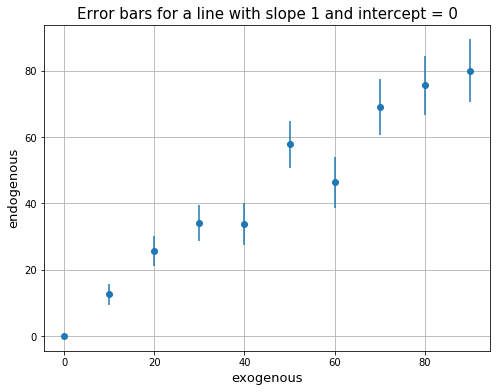

In [3]:
# Plotting the results
np.random.seed(2)
x = np.arange(0,100,10)
slope = 1
y = line(slope, x, 0, errors)
plot1 = pl.figure(figsize=(8,6)).add_subplot(111);
plot1.errorbar(x,y,yerr=errors(x),fmt='o');
plot1.set_title('Error bars for a line with slope %s and intercept = 0' %slope,fontsize=15)
plot1.set_xlabel('exogenous',fontsize=13)
plot1.set_ylabel('endogenous',fontsize=13)
plot1.grid(True)

**Caption**: This plot above is a plot of the error bars for a line of slope 1 with intercept = 0. The error bars increase in size as x increases, which is reasonable given that the error is equal to the square root of x.

## 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
# Print x and y
print('x = %s'%x)
print('y = %s'%y)

# Applying statsmodels.api.add_constant() to x
sm.add_constant(x)

x = [ 0 10 20 30 40 50 60 70 80 90]
y = [  0.          12.52722904  25.64657996  34.1186811   33.71490369
  57.84282736  46.32900606  69.04268275  75.54419455  79.93637672]


array([[  1.,   0.],
       [  1.,  10.],
       [  1.,  20.],
       [  1.,  30.],
       [  1.,  40.],
       [  1.,  50.],
       [  1.,  60.],
       [  1.,  70.],
       [  1.,  80.],
       [  1.,  90.]])

## 3. use statsmodels.api.OLS to fit x and y
## and print the model summary for each and discuss the differences

In [5]:
#THE WRONG WAY
smfit1 = smf.OLS(y, x).fit()
smfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     631.1
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.21e-09
Time:                        23:12:45   Log-Likelihood:                -32.081
No. Observations:                  10   AIC:                             66.16
Df Residuals:                       9   BIC:                             66.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9387      0.037     25.123      0.000         0.854     1.023
==============================================================================
Omnibus:                        0.229   Durbin-Watson:                   2.752
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.278
Skew:                          -0.263   Prob(JB):                        0.870
Kurtosis:                       2.376   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# THE RIGHT WAY
better = sm.add_constant(x)
smfit2 = smf.OLS(y, better).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.31e-06
Time:                        23:12:45   Log-Likelihood:                -31.294
No. Observations:                  10   AIC:                             66.59
Df Residuals:                       8   BIC:                             67.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.2443      3.635      1.168      0.277        -4.138    12.626
x1             0.8717      0.068     12.803      0.000         0.715     1.029
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   3.214
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.143
Skew:                          -0.086   Prob(JB):                        0.931
Kurtosis:                       2.439   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Differences**: The wrong way summary shows a higher R-squared value than the right way summary. This is surprising because I thought that the right way would produce a higher R-squared value. There is one less Df Residual in the right way method compared to the wrong way. The F-statistic is lower in the right way method compared to the wrong way. The wrong way only shows a value for slope (x1) while the right way shows a value for an intercept (const) and a value for slope (x1).

## 4. plot the data (as points) and both statsmodels fits

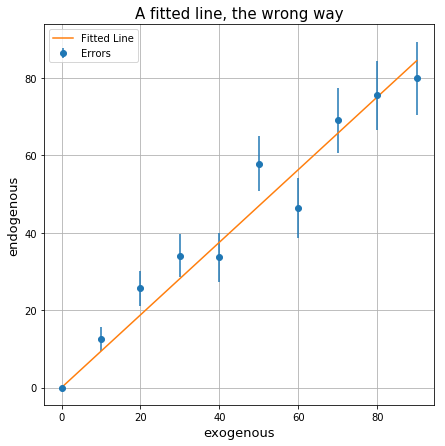

In [7]:
# Wrong way plot
plot4a = pl.figure(figsize=(7,7)).add_subplot(111);
plot4a.errorbar(x,y,yerr=errors(x),fmt='o',label='Errors');
plot4a.plot(x,smfit1.fittedvalues,label='Fitted Line')
plot4a.set_title('A fitted line, the wrong way',fontsize=15)
plot4a.set_xlabel('exogenous',fontsize=13)
plot4a.set_ylabel('endogenous',fontsize=13)
plot4a.grid(True)
plot4a.legend()

**Caption**: Above is a plot of error bars and a fitted line to the data (the wrong way). This method uses just 'x' as the exogenous variable. The fitted line is a straight line that tries to minimize the distance between the line and the data points.

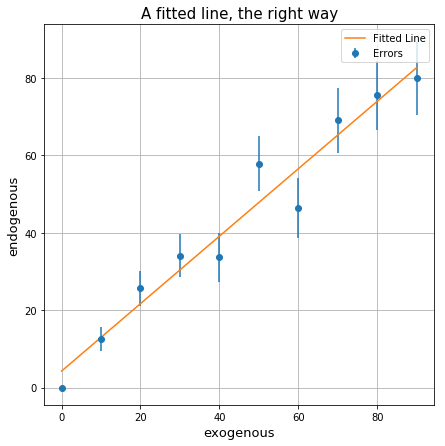

In [8]:
# Right way plot
plot4b = pl.figure(figsize=(7,7)).add_subplot(111);
plot4b.errorbar(x,y,yerr=errors(x),fmt='o',label='Errors');
plot4b.plot(x,smfit2.fittedvalues,label='Fitted Line')
plot4b.set_title('A fitted line, the right way',fontsize=15)
plot4b.set_xlabel('exogenous',fontsize=13)
plot4b.set_ylabel('endogenous',fontsize=13)
plot4b.grid(True)
plot4b.legend()

**Caption**: Above is a plot of error bars and a fitted line to the data (the right way). This method uses statsmodels.api.add_constant(x) as the exogenous variable. The fitted line is a straight line that tries to minimize the distance between the line and the data points.

## 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

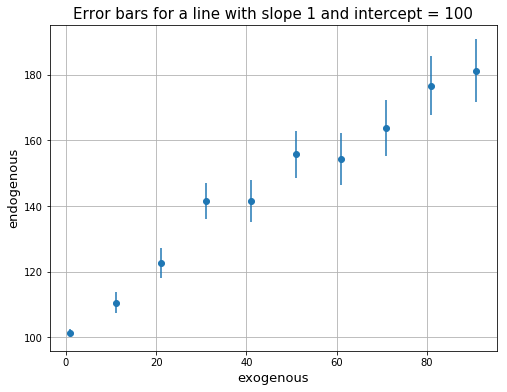

In [9]:
# Plotting the results
x5 = np.arange(1,100,10)
slope = 1
intercept = 100*slope
y5 = line(slope, x5, intercept, errors)
plot1 = pl.figure(figsize=(8,6)).add_subplot(111);
plot1.errorbar(x5,y5,yerr=errors(x5),fmt='o');
plot1.set_title('Error bars for a line with slope %s and intercept = %s' %(slope,intercept),fontsize=15)
plot1.set_xlabel('exogenous',fontsize=13)
plot1.set_ylabel('endogenous',fontsize=13)
plot1.grid(True)

**Caption**: This plot above is a plot of the error bars for a line of slope 1 with intercept = 100. The error bars increase in size as x increases, which is reasonable given that the error is equal to the square root of x.

## 6. repeat step 3

In [10]:
#THE WRONG WAY
smfit1 = smf.OLS(y5, x5).fit()
smfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     53.88
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.37e-05
Time:                        23:12:45   Log-Likelihood:                -54.385
No. Observations:                  10   AIC:                             110.8
Df Residuals:                       9   BIC:                             111.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.5121      0.342      7.340      0.000         1.738     3.286
==============================================================================
Omnibus:                        1.454   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                0.744
Skew:                          -0.133   Prob(JB):                        0.689
Kurtosis:                       1.691   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# THE RIGHT WAY
better5 = sm.add_constant(x5)
smfit2 = smf.OLS(y5, better5).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.66e-07
Time:                        23:12:45   Log-Likelihood:                -29.251
No. Observations:                  10   AIC:                             62.50
Df Residuals:                       8   BIC:                             63.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        104.7809      3.010     34.808      0.000        97.839   111.723
x1             0.8732      0.056     15.732      0.000         0.745     1.001
==============================================================================
Omnibus:                        3.686   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                1.836
Skew:                           1.046   Prob(JB):                        0.399
Kurtosis:                       2.818   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Differences**: The right way summary shows a higher R-squared value than the wrong way summary. This is reasonable given that the right way should be better than the wrong way. There is one less Df Residual in the right way method compared to the wrong way. The F-statistic is higher in the right way method compared to the wrong way. The wrong way only shows a value for slope (x1) while the right way shows a value for an intercept (const) and a value for slope (x1).

## 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [12]:
# THE RIGHT WAY
better7 = sm.add_constant(x5)
weights7 = 1/errors(x5)
smfit7 = smf.WLS(y5, better7, weights7).fit()
smfit7.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            WLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.78e-08
Time:                        23:12:45   Log-Likelihood:                -29.281
No. Observations:                  10   AIC:                             62.56
Df Residuals:                       8   BIC:                             63.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        101.8297      1.859     54.765      0.000        97.542   106.118
x1             0.9288      0.049     19.129      0.000         0.817     1.041
==============================================================================
Omnibus:                        5.477   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                2.360
Skew:                           1.179   Prob(JB):                        0.307
Kurtosis:                       3.328   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

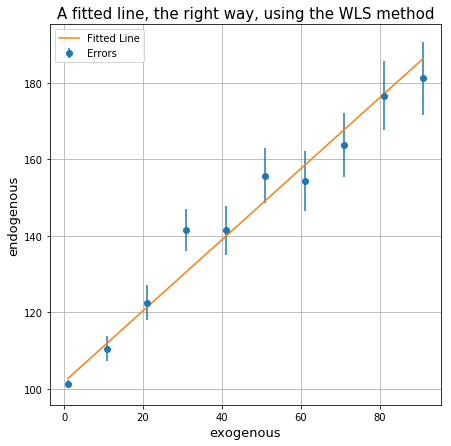

In [13]:
# Right way plot
plot7 = pl.figure(figsize=(7,7)).add_subplot(111);
plot7.errorbar(x5,y5,yerr=errors(x5),fmt='o',label='Errors');
plot7.plot(x5,smfit7.fittedvalues,label='Fitted Line')
plot7.set_title('A fitted line, the right way, using the WLS method',fontsize=15)
plot7.set_xlabel('exogenous',fontsize=13)
plot7.set_ylabel('endogenous',fontsize=13)
plot7.grid(True)
plot7.legend()

**Caption**: Above is a plot of error bars and a fitted line to the data using the WLS method. This method uses weights, which give less weight to observations with higher uncertainties. The fitted line is a straight line that tries to minimize the distance between the line and the data points.